In [1]:
# Imports
import numpy as np
import pyrender
import trimesh
import math
import os
from sklearn.decomposition import PCA
from tqdm.notebook import tnrange, tqdm
import matplotlib.pyplot as plt

import sys
sys.path.append('C:/Users/javie/Desktop/CVC/asdf/src/utils')
from figuras_predefinidas import *
from orientaciones import *
from slices import *


In [2]:
# LOADING MESH
path = "../../../data/oriented_dataset/Dundee 2ROW British/DHBT16P19 10.stl"
mesh = trimesh.load(path)
render_mesh = pyrender.Mesh.from_trimesh(mesh)


# RENDERER
viewport_width = 640
viewport_height = 480
r = pyrender.OffscreenRenderer(viewport_width=viewport_width, viewport_height=viewport_height, point_size=1.0)

# AXIS
axis_flag = True

In [3]:
# XYZ SCENE
camera_eye = np.array([4,4,4], dtype=np.float64)
camera_target = np.array([0,0,0], dtype=np.float64)
camera_up = np.array([0,1,0], dtype=np.float64)

scene_xyz = custom_scene(render_mesh, camera_eye, camera_target, camera_up, axis_flag=axis_flag)
color_xyz, _ = r.render(scene_xyz)

In [4]:
# POSITIVE Z SCENE
camera_eye = np.array([0,0,6], dtype=np.float64)
camera_target = np.array([0,0,0], dtype=np.float64)
camera_up = np.array([0,1,0], dtype=np.float64)

scene_z_pos = custom_scene(render_mesh, camera_eye, camera_target, camera_up, axis_flag=axis_flag)
color_z_pos, _ = r.render(scene_z_pos)

In [5]:
# NEGATIVE Z SCENE
camera_eye = np.array([0,0,-6], dtype=np.float64)
camera_target = np.array([0,0,0], dtype=np.float64)
camera_up = np.array([0,1,0], dtype=np.float64)

scene_z_neg = custom_scene(render_mesh, camera_eye, camera_target, camera_up, axis_flag=axis_flag)
color_z_neg, _ = r.render(scene_z_neg)

In [6]:
# POSITIVE X SCENE
camera_eye = np.array([6,0,0], dtype=np.float64)
camera_target = np.array([0,0,0], dtype=np.float64)
camera_up = np.array([0,1,0], dtype=np.float64)

scene_x_pos = custom_scene(render_mesh, camera_eye, camera_target, camera_up, axis_flag=axis_flag)
color_x_pos, _ = r.render(scene_x_pos)

In [7]:
# NEGATIVE X SCENE
camera_eye = np.array([-6,0,0], dtype=np.float64)
camera_target = np.array([0,0,0], dtype=np.float64)
camera_up = np.array([0,1,0], dtype=np.float64)

scene_x_neg = custom_scene(render_mesh, camera_eye, camera_target, camera_up, axis_flag=axis_flag)
color_x_neg, _ = r.render(scene_x_neg)

In [8]:
# POSITIVE Y SCENE
camera_eye = np.array([0,6,0], dtype=np.float64)
camera_target = np.array([0,0,0], dtype=np.float64)
camera_up = np.array([0,0,1], dtype=np.float64)

scene_y_pos = custom_scene(render_mesh, camera_eye, camera_target, camera_up, axis_flag=axis_flag)
color_y_pos, _ = r.render(scene_y_pos)

In [9]:
# NEGATIVE Y SCENE
camera_eye = np.array([0,-6,0], dtype=np.float64)
camera_target = np.array([0,0,0], dtype=np.float64)
camera_up = np.array([0,0,1], dtype=np.float64)

scene_y_neg = custom_scene(render_mesh, camera_eye, camera_target, camera_up, axis_flag=axis_flag)
color_y_neg, _ = r.render(scene_y_neg)

In [10]:
# VOID SCENE
camera_eye = np.array([50,0,0], dtype=np.float64)
camera_target = np.array([60,0,0], dtype=np.float64)
camera_up = np.array([0,1,0], dtype=np.float64)

scene_void = custom_scene(render_mesh, camera_eye, camera_target, camera_up, axis_flag=axis_flag)
color_void, _ = r.render(scene_void)

In [11]:
# X SECTION
xsec = xsection(mesh)
yy = xsec[:, 1]
zz = xsec[:, 2]
xsec_y, xsec_z = flip_and_roll(yy,zz)

# Y SECTION
ysec = ysection(mesh)
xx = ysec[:, 0]
zz = ysec[:, 2]
ysec_x, ysec_z = flip_and_roll(xx,zz)

# Z SECTION
zsec = zsection(mesh)
xx = zsec[:, 0]
yy = zsec[:, 1]
zsec_x, zsec_y = flip_and_roll(xx,yy)


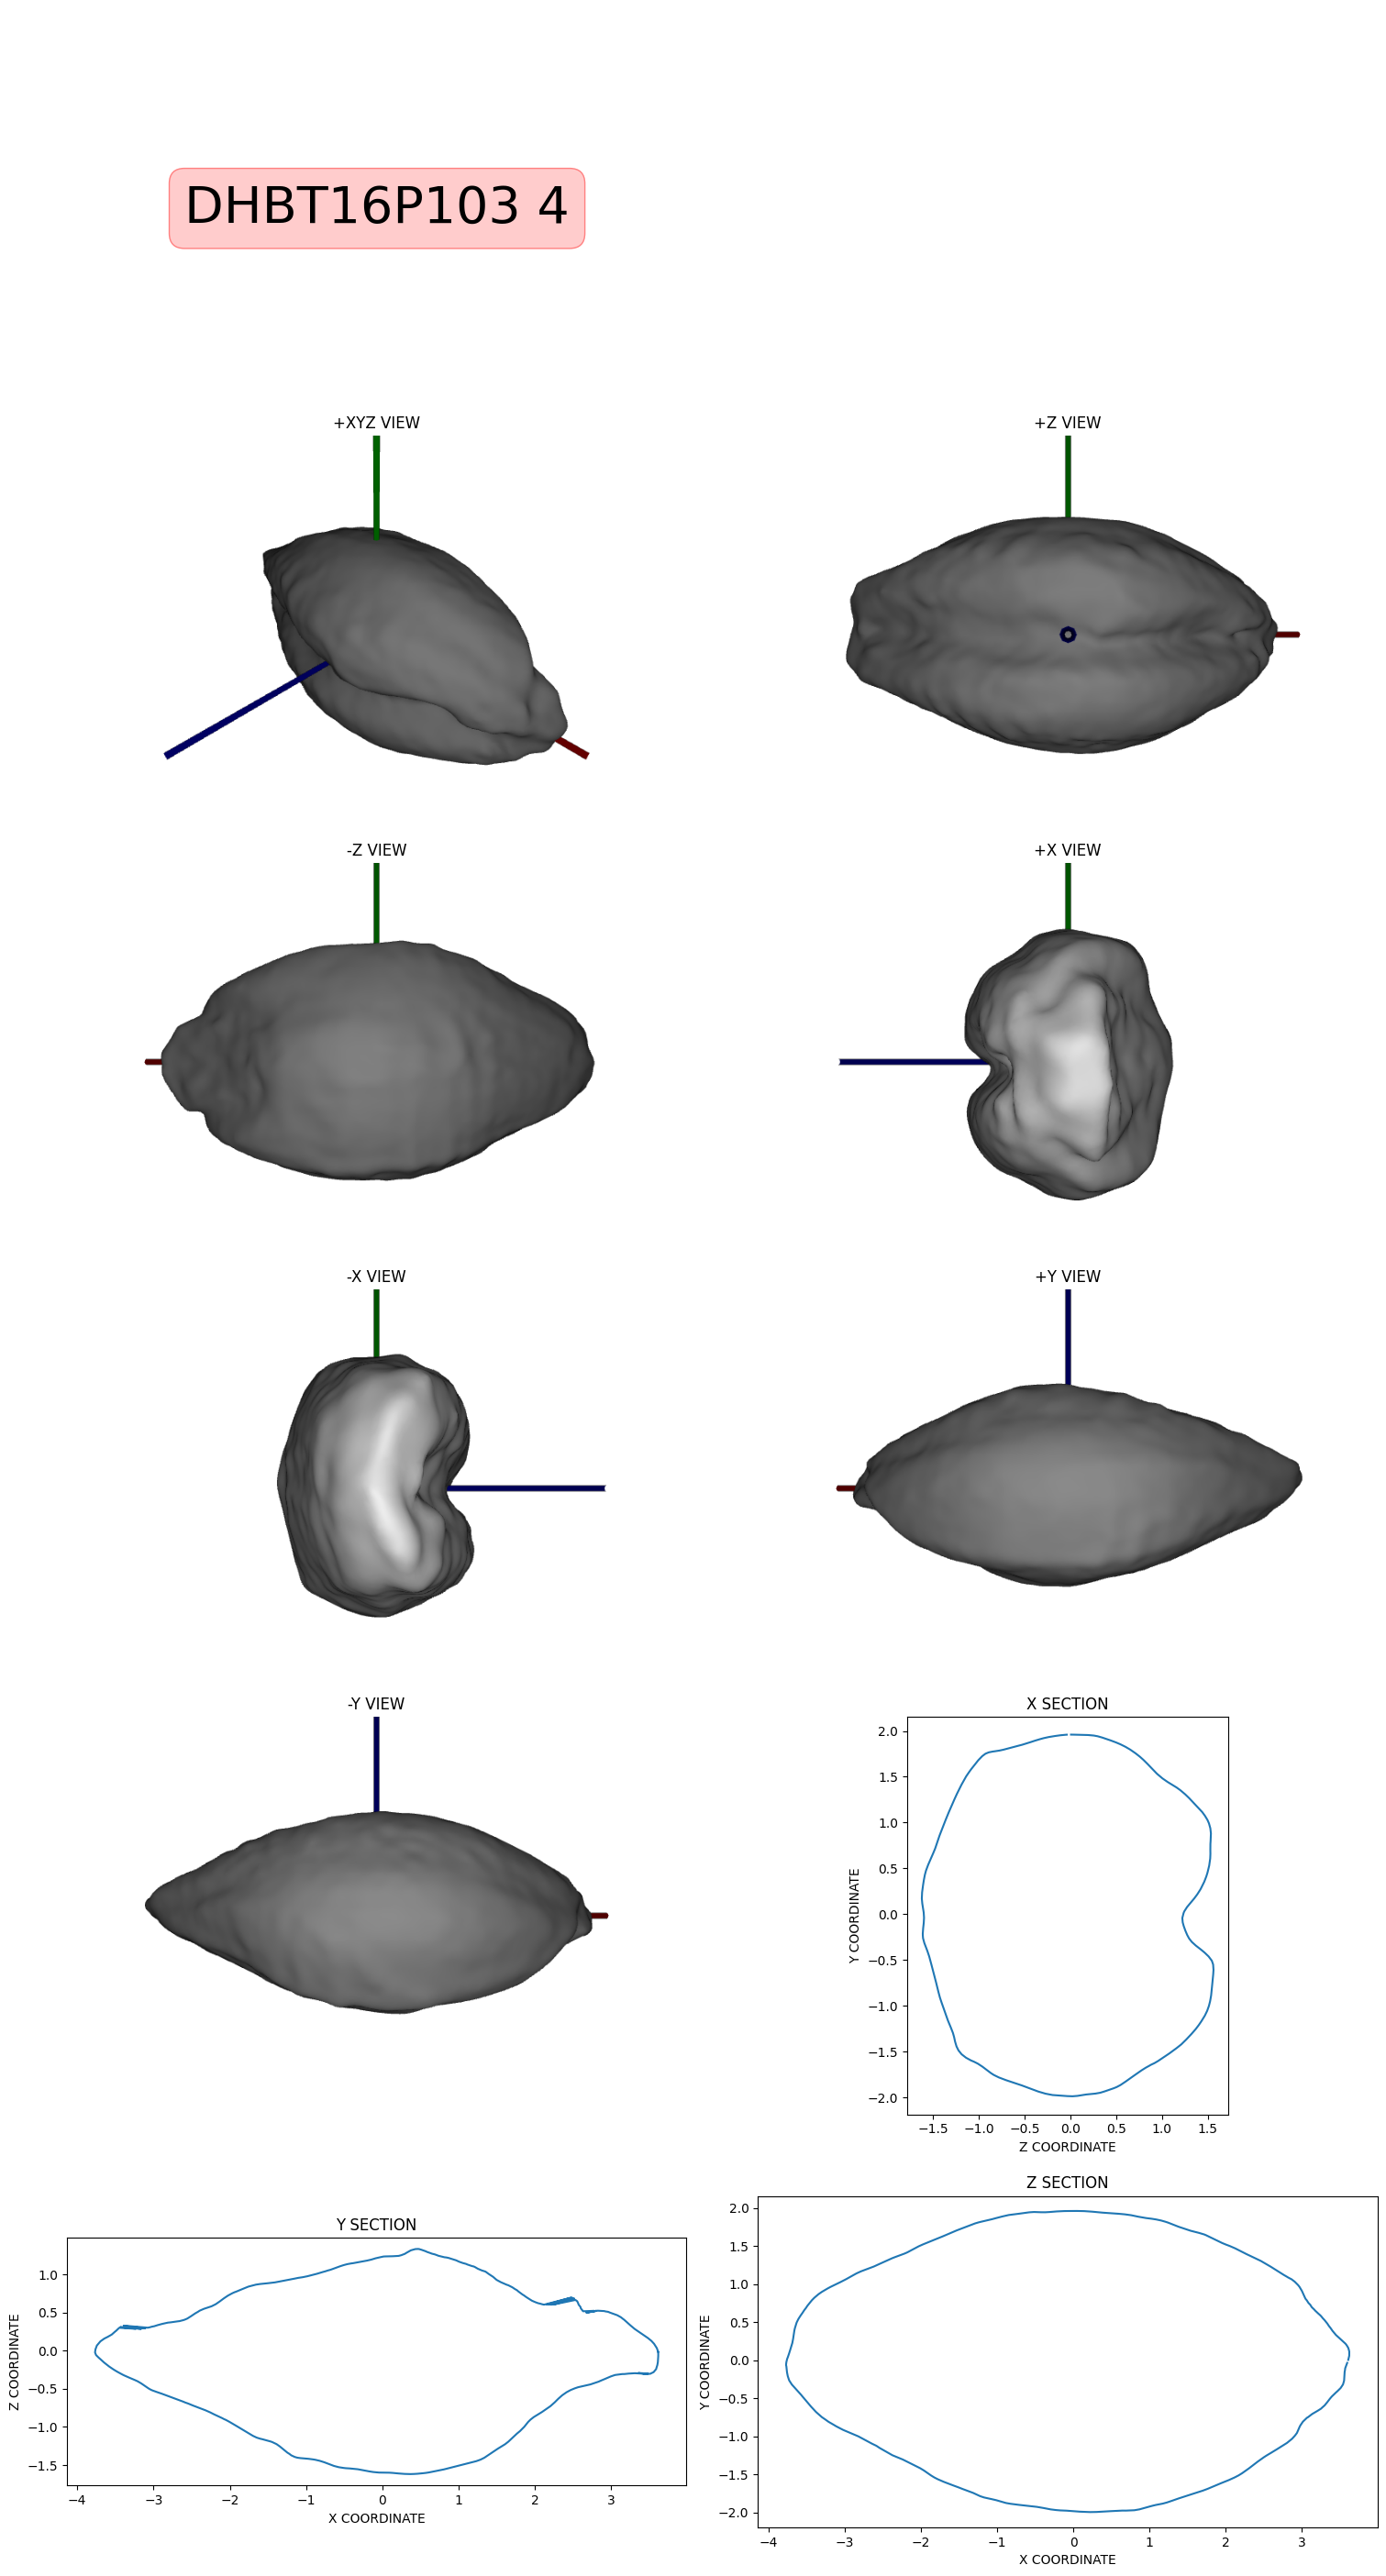

In [23]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(6, 2, constrained_layout=True, figsize=(15,28))
axs[0, 0].imshow(color_void)
axs[0, 0].text(0.5*viewport_width, 0.5*viewport_height, "DHBT16P103 4", size=40, rotation=0.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
axs[0, 0].axis('off')
axs[0, 1].imshow(color_void)
axs[0, 1].axis('off')

axs[1, 0].imshow(color_xyz)
axs[1, 0].set_title('+XYZ VIEW')
axs[1, 0].axis('off')

axs[1, 1].imshow(color_z_pos)
axs[1, 1].set_title('+Z VIEW')
axs[1, 1].axis('off')
axs[2, 0].imshow(color_z_neg)
axs[2, 0].set_title('-Z VIEW')
axs[2, 0].axis('off')


axs[2, 1].imshow(color_x_pos)
axs[2, 1].set_title('+X VIEW')
axs[2, 1].axis('off')
axs[3, 0].imshow(color_x_neg)
axs[3, 0].set_title('-X VIEW')
axs[3, 0].axis('off')


axs[3, 1].imshow(color_y_pos)
axs[3, 1].set_title('+Y VIEW')
axs[3, 1].axis('off')
axs[4, 0].imshow(color_y_neg)
axs[4, 0].set_title('-Y VIEW')
axs[4, 0].axis('off')


axs[4, 1].plot(xsec_z, xsec_y)
axs[4, 1].set_title('X SECTION')
axs[4, 1].set_xlabel('Z COORDINATE')
axs[4, 1].set_ylabel('Y COORDINATE')

axs[5, 0].plot(ysec_x, ysec_z)
axs[5, 0].set_title('Y SECTION')
axs[5, 0].set_xlabel('X COORDINATE')
axs[5, 0].set_ylabel('Z COORDINATE')

axs[5, 1].plot(zsec_x, zsec_y)
axs[5, 1].set_title('Z SECTION')
axs[5, 1].set_xlabel('X COORDINATE')
axs[5, 1].set_ylabel('Y COORDINATE')

for i in range(4, 6):
    for j in range(2):
        axs[i, j].set_aspect(1, adjustable='box')

plt.show()